# Making a trial by trial fit of faceWord dataand using that for searchligth classificiation

This tutorial will load models and data from tutorial 13 and change the design matrix to one that gives a beta estimate for each trial.

In [1]:
# import some functionality
from datetime import datetime

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
os.system('python -m pip install numpy')
os.system('python -m pip install matplotlib')
os.system('python -m pip install scipy')
os.system('python -m pip install panda')
os.system('python -m pip install nilearn')
os.system('python -m pip install sklearn')
os.system('python -m pip install pickle')
os.system('python -m pip install atlasreader')
os.system('python -m pip install seaborn')

#import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:26:59


sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found
sh: 1: python: not found


Finishing cell: 10:27:18


In [2]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

# Getting the first level models from tutorial 13:
f = open('/work/82777/WordFace_first_level_models.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:27:18


/home/coder/.local/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


Finishing cell: 10:28:06


## Saving/retrieving the fitted models and design matrices

In [3]:
import pickle

# Getting back the objects:
f = open('/work/82777/WordFace_first_level_models_all_trials_all_par.pkl', 'rb')
models_trials_all, lsa_dm = pickle.load(f)
f.close()

#print(model1[0])
#now = datetime.now()
#print('Finishing cell:',now.strftime("%H:%M:%S"))

## Load z maps and classification labels for each participant


In [4]:
# Getting back the objects:
N_par=len(models_events) # Number of participants
z_maps_all= np.empty((N_par, 0)).tolist()
conditions_label_all= np.empty((N_par, 0)).tolist()
for i in range(N_par):
    text = "Loading file %d\n" % (i+1)
    print(text)
    file_name='/work/82777/WordFace_first_level_z_maps_all_trials_all_par_'+str(i)+'.pkl'
    f = open(file_name, 'rb')
    conditions_label_temp, z_maps_temp = pickle.load(f)
    conditions_label_all[i]=conditions_label_temp
    z_maps_all[i]=z_maps_temp
    f.close()

print(conditions_label_all[9])
            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Loading file 1

Loading file 2

Loading file 3

Loading file 4

Loading file 5

Loading file 6

Loading file 7

Loading file 8

Loading file 9

Loading file 10

Loading file 11

Loading file 12

Loading file 13

Loading file 14

Loading file 15

Loading file 16

Loading file 17

Loading file 18

Loading file 19

Loading file 20

Loading file 21

Loading file 22

['image_pos', 'image_neg', 'image_pos', 'image_pos', 'image_neg', 'image_pos', 'image_pos', 'image_neg', 'image_pos', 'image_neg', 'image_pos', 'image_neg', 'image_pos', 'image_neg', 'image_neg', 'image_neg', 'image_neg', 'image_neg', 'image_pos', 'image_pos', 'image_neg', 'image_pos', 'image_pos', 'image_neg', 'image_neg', 'image_neg', 'image_pos', 'image_neg', 'image_neg', 'image_neg', 'image_pos', 'image_pos', 'image_neg', 'image_pos', 'image_neg', 'image_neg', 'image_neg', 'image_pos', 'image_pos', 'image_pos', 'image_pos', 'image_pos', 'image_neg', 'image_pos', 'image_neg', 'image_pos', 'image_neg', 'image_pos', 'image_pos

## Reshape data for classification

In [5]:

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

import numpy as np
#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img
from sklearn.model_selection import train_test_split, GroupKFold

N_par=len(models_events) # Number of participants
z_maps_img_all= np.empty((N_par, 0)).tolist()
z_maps_conc= np.empty((N_par, 0)).tolist()
conditions= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    n_trials=len(conditions_label_all[i])
    text = "Reshaping participant %d\n" % (i+1)
    print(text)


    # Reshaping data------------------------------
    from nilearn.image import index_img, concat_imgs
    idx_neg=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii]=='image_neg']
    idx_pos=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii]=='image_pos']

    #Concatenate trials
    idx=np.concatenate((idx_neg, idx_pos))

    conditions[i]=np.array(conditions_label_all[i])[idx]
    z_maps_conc[i]=concat_imgs(z_maps_all[i])
    print(z_maps_conc[i].shape)
    z_maps_img_all[i] = index_img(z_maps_conc[i], idx)

    print(z_maps_img_all[i].shape)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:37:15
Reshaping participant 1

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 2

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 3

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 4

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 5

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 6

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 7

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 8

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 9

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 10

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 11

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 12

(79, 93, 65, 720)
(79, 93, 65, 360)
Reshaping participant 13

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 14

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 15

(78, 92, 65, 720)
(78, 92, 65, 360)
Reshaping participant 16

(78, 92, 65, 720)
(78, 92, 65

## create training and testing vars on the basis of class labels

In [6]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

N_par=len(models_events) # Number of participants
idx1= np.empty((N_par, 0)).tolist()
idx2= np.empty((N_par, 0)).tolist()
conditions1= np.empty((N_par, 0)).tolist()
conditions2= np.empty((N_par, 0)).tolist()
fmri_img1= np.empty((N_par, 0)).tolist()
fmri_img2= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Creating trian/test data for participant %d\n" % (i+1)
    print(text)
    idx2[i]=np.arange(conditions[i].shape[0])
    # create training and testing vars on the basis of class labels
    idx1[i],idx2[i], conditions1[i],  conditions2[i] = train_test_split(idx2[i],conditions[i], test_size=0.2)
    
    # Reshaping data------------------------------
    from nilearn.image import index_img
    fmri_img1[i] = index_img(z_maps_img_all[i], idx1[i])
    fmri_img2[i] = index_img(z_maps_img_all[i], idx2[i])

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:37:48
Creating trian/test data for participant 1

Creating trian/test data for participant 2

Creating trian/test data for participant 3

Creating trian/test data for participant 4

Creating trian/test data for participant 5

Creating trian/test data for participant 6

Creating trian/test data for participant 7

Creating trian/test data for participant 8

Creating trian/test data for participant 9

Creating trian/test data for participant 10

Creating trian/test data for participant 11

Creating trian/test data for participant 12

Creating trian/test data for participant 13

Creating trian/test data for participant 14

Creating trian/test data for participant 15

Creating trian/test data for participant 16

Creating trian/test data for participant 17

Creating trian/test data for participant 18

Creating trian/test data for participant 19

Creating trian/test data for participant 20

Creating trian/test data for participant 21

Creating trian/test data for participant

In [7]:
print(len(conditions[0]))
print(len(idx1[0]))
print(len(idx2[0]))

360
288
72


## Analysis

### Creating a mask (Asgers code but modified to fit our hypothesis)

In [8]:
# Getting back the objects: #Affine matrix
f = open('/work/fMRI_stuff/WordFace_first_level_models1.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

import nibabel as nib
test_img = nib.load(models_run_imgs[1][1]) 


Dataset created in /work/fMRI Assignment/neuro_exam/atlases/fsl



Downloaded 7684096 of 25716861 bytes (29.9%,    2.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /work/fMRI Assignment/neuro_exam/atlases/fsl/85ec261a7586c17bacffc8f1a0c69ac2/HarvardOxford.tgz..... done.


225


/home/coder/.local/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


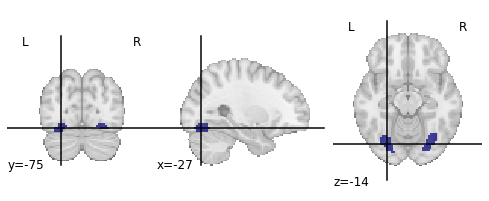

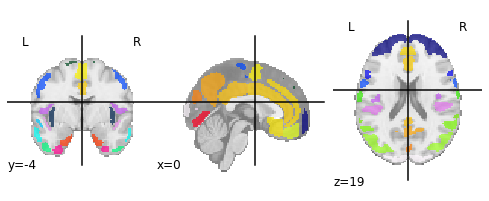

In [9]:
import nilearn
from nilearn import plotting
atlas_name = "cort-maxprob-thr50-2mm"

atlas = nilearn.datasets.fetch_atlas_harvard_oxford(atlas_name, data_dir="/work/fMRI Assignment/neuro_exam/atlases", symmetric_split=False, resume=True, verbose=1)
#atlas2 = nilearn.datasets.fetch_atlas_harvard_oxford(atlas_name, data_dir="/work/fMRI Assignment/neuro_exam/atlases", symmetric_split=False, resume=True, verbose=1)
# PREPARING ATLAS
atlas_img = atlas["maps"]
# Get labels
labels = atlas.labels
atlas_data = atlas_img.get_fdata()

from nilearn.image import resample_img as resample

target_affine = test_img.affine

shape = test_img.shape
target_shape = [shape[0], shape[1], shape[2]]

resampled_atlas = resample(atlas_img,target_affine = target_affine, target_shape = target_shape, interpolation = 'nearest')

resamp_data = resampled_atlas.get_fdata()

mask = resamp_data.copy()


x = resamp_data.shape[0]
y = resamp_data.shape[1]
z = resamp_data.shape[2]

# This will set all elements of atlas_data to either 0 or 1.
m = 0
for i in range(0, x):
    for j in range(0, y):
        for k in range(0, z):
            if resamp_data[i][j][k] in [40]:
                m += 1
                mask[i][j][k] = 1
            else:
                mask[i][j][k] = 0
print(m)


#mask_nifti = nib.Nifti1Image(mask, affine = target_affine).to_filename('ffa_mask.nii.gz')
mask_nifti = nib.Nifti1Image(mask, affine = target_affine)
plotting.plot_roi(mask_nifti)
plotting.plot_roi(atlas_img)



nib.save(mask_nifti, 'ffa_mask.nii')



## Prepare an analysis on the first split

Starting cell: 10:38:43


/home/coder/.local/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Finishing cell: 10:38:45


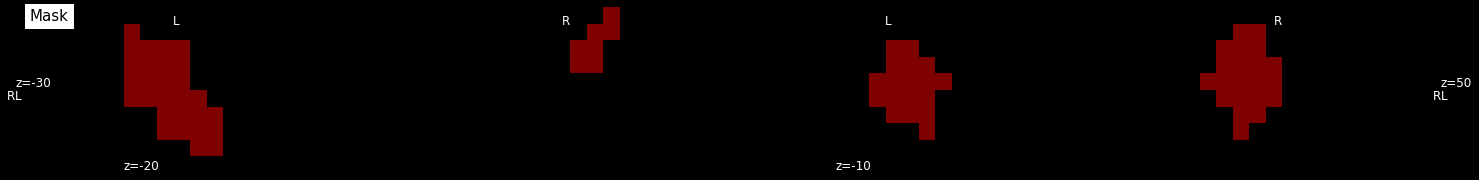

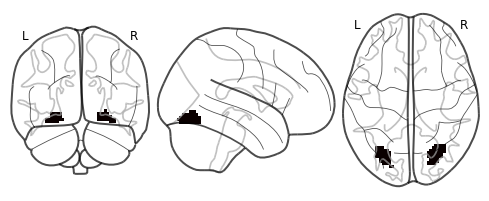

In [10]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
# -------------------
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn.plotting import plot_stat_map, plot_img, show

#Whole brain mask. Using one from a one participant for all
mask_wb_filename='/work/82777/BIDS/derivatives/sub-0096/anat/sub-0096_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
#Load the whole brain mask
mask_img_whole = load_img(mask_wb_filename)

ffa_mask_filename= "/work/fMRI_stuff/ffa_mask.nii.gz"
#Using the mask I made instead
mask_img = load_img(ffa_mask_filename)


# .astype() makes a copy.
#process_mask = mask_img.get_fdata().astype(np.int)
#Set slices below x in the z-dimension to zero (in voxel space)
#process_mask[..., :30] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
#process_mask[..., 160:] = 0
#process_mask_img = new_img_like(mask_img, process_mask)


#Plot the mask
plot_img(mask_nifti, title="Mask", display_mode="z",cut_coords=[-30,-20,-10,0,10,20,30,40,50],
         vmin=.40, cmap='jet', threshold=0.9, black_bg=True)

nilearn.plotting.plot_glass_brain(mask_nifti)
#########################################################################





#########################################################################

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Perform a permutation test

In [16]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

from nilearn.maskers import NiftiMasker
from sklearn.model_selection import permutation_test_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

#ffa_mask_filename= "/work/fMRI_stuff/ffa_mask.nii.gz"
#Using the mask I made instead
#mask_img = load_img(ffa_mask_filename)


score = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
permutation_scores = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pvalue = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cv_score = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(N_par):

    masker = NiftiMasker(mask_img = mask_nifti, standardize=False)
    # We use masker to retrieve a 2D array ready
    # for machine learning with scikit-learn
    fmri_masked = masker.fit_transform(fmri_img2[i])
    #Print size of matrix (images x voxels)
    
    #MIKKELS KODE
    score[i], permutation_scores[i], pvalue[i]= permutation_test_score(
        LinearSVC(penalty='l2'), fmri_masked, conditions2[i], cv=10, n_permutations=1000, 
        n_jobs=-1, random_state=0, verbose=0, scoring=None)
    #print("Classification Accuracy for participant %d: %s (pvalue : %s)" % (i, score, pvalue))
    #print("Classification Accuracy for participant %d: %s (pvalue : %s)" % (i, score[i], pvalue[i]))

    
    
    #MODIFICERET VERSION AF ASGERS KODE
    cv_score[i] = cross_val_score(LinearSVC(penalty='l2'), fmri_masked, conditions2[i], cv=10)
    #print(cv_score)
    print('Mean prediction score pr participant:')
    print(np.mean(cv_score[i]))

print('Mean prediction score:')
print(np.mean(cv_score))

 
# Saving the objects:
#f = open('/work/fMRI_stuff/WordFace_first_level_models_all_trials_all_par.pkl', 'wb')
#pickle.dump([searchlight_all, searchlight_img, cut, perc, process_mask2_img, score,permutation_score,pvalue], f)
#f.close()


now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))





Starting cell: 10:45:55
Mean prediction score pr participant:
0.5125
Mean prediction score pr participant:
0.5982142857142857
Mean prediction score pr participant:
0.45178571428571435
Mean prediction score pr participant:
0.4839285714285714
Mean prediction score pr participant:
0.5678571428571428
Mean prediction score pr participant:
0.4875
Mean prediction score pr participant:
0.5071428571428571
Mean prediction score pr participant:
0.6249999999999999
Mean prediction score pr participant:
0.7142857142857142
Mean prediction score pr participant:
0.5249999999999999
Mean prediction score pr participant:
0.5232142857142857
Mean prediction score pr participant:
0.4875
Mean prediction score pr participant:
0.5696428571428571
Mean prediction score pr participant:
0.4982142857142858
Mean prediction score pr participant:
0.4017857142857143
Mean prediction score pr participant:
0.46964285714285714
Mean prediction score pr participant:
0.425
Mean prediction score pr participant:
0.58333333333333

In [24]:
#Saving cv scores

#print(cv_score)

#for i in cv_score: 
df = pd.DataFrame(cv_score, columns = ["score_1", "score_2", "score_3", "score_4", "score_5", "score_6", "score_7", "score_8", "score_9", "score_10"])


df.to_csv("cv_scores.csv")


### View a histogram of permutation scores

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#How many classes
#n_classes = np.unique(conditions2[0]).size
plt.hist(permutation_scores[20], 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score[20]], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue[20])
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')


plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

: 

In [ ]:
# for i in range(22):
#     plt.hist(permutation_scores[i], 20, label='Permutation scores',
#          edgecolor='black')
#     ylim = plt.ylim()
#     plt.plot(2 * [score[i]], ylim, '--g', linewidth=3,
#             label='Classification Score'
#             ' (pvalue %s)' % pvalue[i])
#     plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

   
#     plt.ylim(ylim)
#     plt.legend()
#     plt.xlabel('Score')
#     plt.show()



: 

: 